In [17]:
import torch
import torchvision
from torch import nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

from PIL import Image
import os

In [18]:
class ImagesDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.img_names = os.listdir(root_dir)
        
    def __getitem__(self, index):
        img = Image.open(self.root_dir + '/' + self.img_names[index]).convert('L')
        item = transforms.ToTensor()(img)
        img.close()
        return item.reshape(64 * 64)

    def __len__(self):
        return len(self.img_names)

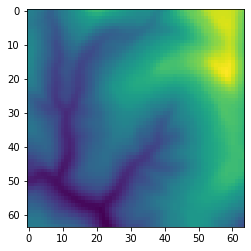

In [19]:
import matplotlib.pyplot as plt

dataset = ImagesDataset('./data')
plt.imshow(dataset[400].view(64, 64))
plt.show()

In [339]:
dataloader = DataLoader(dataset, batch_size=25, shuffle=True)

In [277]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # Encoder specification
        self.enc_linear_1 = nn.Linear(64 * 64, 1024)
        self.enc_linear_2 = nn.Linear(1024, 512)
        self.enc_linear_3 = nn.Linear(512, 64)
        
        # Decoder specification
        self.dec_linear_1 = nn.Linear(64, 512)
        self.dec_linear_2 = nn.Linear(512, 1024)
        self.dec_linear_3 = nn.Linear(1024, 64 * 64)
        
    def encode(self, data):
        code = F.relu(self.enc_linear_1(data))
        code = F.relu(self.enc_linear_2(code))
        code = self.enc_linear_3(code)
        return code
        
    def decode(self, code):
        out = F.relu(self.dec_linear_1(code))
        out = F.relu(self.dec_linear_2(out))
        out = self.dec_linear_3(out)
        return out
        
    def forward(self, data):
        code = self.encode(data)
        out = self.decode(code)
        return out

In [278]:
net = Autoencoder().cuda()

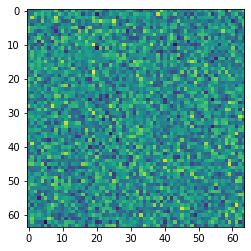

In [279]:
x = dataset[400].cuda()
output = net(x)
plt.imshow(output.cpu().view(64, 64).detach().numpy())
plt.show()

In [381]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.0001)

epochs = 50

for epoch in range(epochs):
    for data in dataloader:
        net.zero_grad()
        x = Variable(data).cuda()
        output = net(x)
        loss = nn.MSELoss()(output, x)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward

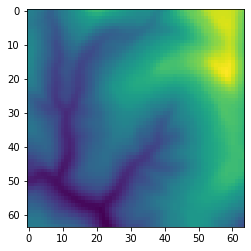

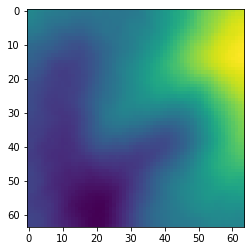

In [382]:
x = dataset[400].cuda()
plt.imshow(x.view(64, 64).cpu())
plt.show()
output = net(x)
plt.imshow(output.view(64, 64).cpu().detach().numpy())
plt.show()

In [411]:
#torch.save(net, './simple_autoencoder_save')

In [29]:
net = torch.load('./simple_autoencoder_save')

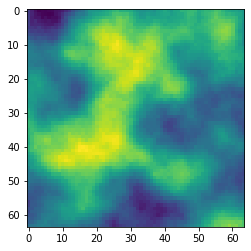

tensor([-408.4874,  404.8843,  772.2992, -229.2687,  208.9841, -341.6783,
        -801.9175, -937.3693,  953.8572,  131.4585, -327.2930,  980.7938,
         -53.7957, -903.7354,   40.5433, -192.2233,  792.2034,  812.2775,
         548.8373,  559.6570,  166.0793, -672.9371,   30.6688,  827.7509,
         722.9740, -331.3771, -343.5743,  582.0741, -592.8923, -259.5338,
         -29.0667,  741.2068, -169.7598, -395.4069, -936.5015,  519.3937,
        -986.6913,  607.8790, -424.4288,  333.9656,   82.2268, -669.5814,
        -264.4081,  724.5013, -424.8547, -341.1524, -895.9038, -831.8798,
         -45.2763, -175.5020,  533.3750,  344.0815,  -71.8323,  110.8282,
        -361.5814,  893.2177,  651.4786, -375.8695, -662.2198, -677.5004,
        -957.2797,  -98.9586, -382.8330, -390.6663], device='cuda:0')


In [410]:
# Generator
code = torch.rand(64).uniform_(-1000., 1000.).cuda()
output = net.decode(code)
plt.imshow(output.view(64, 64).cpu().detach().numpy())
plt.show()
print(code)